<a href="https://colab.research.google.com/github/vixerica0726/Curso-Udemy-Python/blob/main/desafioSquadKJ.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##  Squad Katherine Johnson

Bárbara Cravo da Silva

Erica Felix De Oliveira

Gisele Lika Harano

Iasmim Campos Moreira

Leticia Coelho Rosa

Luana Schmitz

Paula de Almeida Freitas

# Desafio 1: Entendendo o consumidor.

Suponha que você trabalha em uma empresa de streaming e, com as mudanças no mercado, a equipe de marketing suspeita que o perfil dos clientes que cancelaram a assinatura mudou. Eles pediram sua ajuda para
entender:

1 - Se o perfil dos clientes que cancelam hoje é diferente do perfil dos clientes que cancelaram anteriormente.

Dica: Fazer um comparativo dos clientes que cancelaram nos últimos 6 meses com os que cancelaram a mais de 24 meses.

2 - Quais são as principais diferenças entre os perfis, para que possam criar estratégias mais eficazes de retenção. Para isso, eles fornecem a base de dados clientes.csv, que contém informações anonimizadas sobre os clientes ao longo do tempo.


1. Analise a distribuição de idade, tempo de assinatura, frequência de
uso e região dos clientes que cancelaram e dos novos clientes no período de 24 meses.

2. Plote gráficos para identificar padrões nos clientes que mantêm e cancelam a assinatura.

3. Utilize testes estatísticos para verificar se há uma relação significativa entre tempo de assinatura e taxa de cancelamento.

4. Suponha agora que os dados recebidos são somente uma amostra da sua população total de clientes. Suponha que a sua "população" de clientes verdadeira é de 100000. Qual o tamanho da amostra necessária para chegarmos a conclusões com 95% de confiança e 2%
de margem de erro? A base informada é suficiente? E com uma margem de erro de 10%?

In [ ]:
# Importação de bibliotecas para manipulação de dados e visualização
import pandas as pd  # Manipular os dados
import numpy as np  # Operações matemáticas
import matplotlib.pyplot as plt  # Criar gráficos
import scipy.stats as stats  # Funções estatísticas e probabilísticas
import seaborn as sns  # Criar gráficos

# Carregar o dataset
df = pd.read_csv('clientes.csv')
df.head(10)

,cliente_id,idade,tempo_assinatura_meses,frequencia_uso_mensal,regiao,mensalidade,cancelou
0,1,56,30,27,Centro-Oeste,96.03,1
1,2,69,11,2,Norte,91.22,0
2,3,46,58,21,Sul,56.45,0
3,4,32,55,1,Norte,69.61,0
4,5,60,28,28,Sul,42.19,0
5,6,25,25,15,Sul,35.05,0
6,7,38,39,1,Nordeste,57.10,0
7,8,56,33,5,Sul,48.27,0
8,9,36,1,28,Sudeste,66.69,0
9,10,40,57,29,Centro-Oeste,26.22,0


In [ ]:
df.info() # Verificando a estrutura das colunas e tipos de dados

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   cliente_id              200 non-null    int64  
 1   idade                   200 non-null    int64  
 2   tempo_assinatura_meses  200 non-null    int64  
 3   frequencia_uso_mensal   200 non-null    int64  
 4   regiao                  200 non-null    object 
 5   mensalidade             200 non-null    float64
 6   cancelou                200 non-null    int64  
dtypes: float64(1), int64(5), object(1)
memory usage: 11.1+ KB


Quantidade de Registros:
O dataset contém 200 registros, numerados de 0 a 199.

Colunas e Tipos de Dados:

cliente_id, idade, tempo_assinatura_meses, frequencia_uso_mensal, cancelou: Dados numéricos inteiros (int64).

regiao: Dados de texto ou categóricos (object).

mensalidade: Dados numéricos decimais (float64).

In [ ]:
df.describe()  # Descrever os dados nos ajudam a entender a distribuição e variação dos dados, além de identificar possíveis outliers.

,cliente_id,idade,tempo_assinatura_meses,frequencia_uso_mensal,mensalidade,cancelou
count,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,45.260000,30.890000,15.980000,59.129000,0.280000
std,57.879185,16.040852,17.679102,8.843679,23.318007,0.450126
min,1.000000,18.000000,1.000000,1.000000,21.160000,0.000000
25%,50.750000,31.750000,16.750000,8.000000,38.807500,0.000000
50%,100.500000,45.000000,32.000000,17.000000,57.710000,0.000000
75%,150.250000,59.000000,48.000000,23.000000,79.680000,1.000000
max,200.000000,74.000000,59.000000,29.000000,99.980000,1.000000


count: Número de valores não nulos em cada coluna.

mean: Média dos valores de cada coluna.

std: Desvio padrão, indicando a variação em torno da média.

min: Valor mínimo presente em cada coluna.

25%, 50% (mediana), 75%: Os quartis, que mostram como os dados estão distribuídos.

max: Valor máximo em cada coluna.

In [ ]:
# Filtrando os clientes que cancelaram
df_cancelaram = df[df['cancelou'] == 1]

# Filtrando clientes que cancelaram nos últimos 6 meses (tempo de assinatura <= 6 meses)
df_ultimos_6_meses = df_cancelaram[df_cancelaram['tempo_assinatura_meses'] <= 6]

# Filtrando clientes que cancelaram há mais de 24 meses (tempo de assinatura > 24 meses)
df_mais_24_meses = df_cancelaram[df_cancelaram['tempo_assinatura_meses'] > 24]

# Verificando quantos clientes foram encontrados em cada grupo
print(f"Clientes que cancelaram nos últimos 6 meses: {df_ultimos_6_meses.shape[0]}")
print(f"Clientes que cancelaram há mais de 24 meses: {df_mais_24_meses.shape[0]}")


Clientes que cancelaram nos últimos 6 meses: 9
Clientes que cancelaram há mais de 24 meses: 32


Grupo de 6 meses (9 clientes): Esses clientes representam usuários que provavelmente tiveram uma primeira impressão ruim, não encontraram valor no serviço, ou migraram para concorrentes rapidamente.

Grupo de 24 meses (32 clientes): Esses clientes, por sua longa permanência, podem estar saturados, com mudança de interesses ou considerando o custo-benefício.

Ações possíveis - Criar estratégias para melhorar a retenção inicial, como um onboarding mais eficaz, recompensas iniciais e contato personalizado.

Incentive a fidelidade de clientes antigos com programas de recompensas de longo prazo ou ofertas exclusivas para revitalizar o interesse.

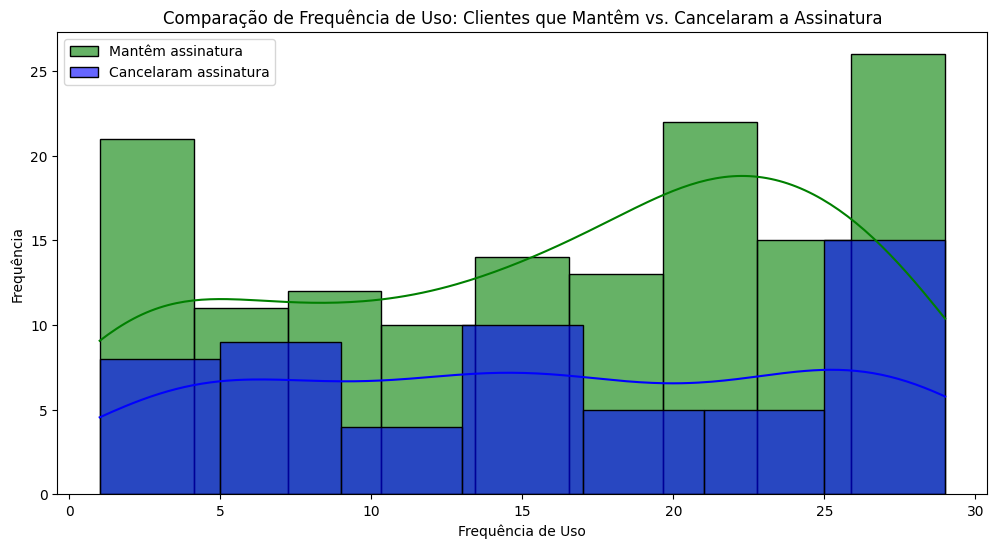

In [ ]:
# Comparação de frequência de uso entre clientes que mantêm e cancelaram
plt.figure(figsize=(12, 6))
sns.histplot(df_nao_cancelaram['frequencia_uso_mensal'], color='green', kde=True, label="Mantêm assinatura", alpha=0.6)
sns.histplot(df_cancelaram['frequencia_uso_mensal'], color='blue', kde=True, label="Cancelaram assinatura", alpha=0.6)
plt.legend()
plt.title('Comparação de Frequência de Uso: Clientes que Mantêm vs. Cancelaram a Assinatura')
plt.xlabel('Frequência de Uso')
plt.ylabel('Frequência')
plt.show()

O eixo X (Frequência de Uso) representa a frequência mensal com que o serviço é utilizado.

O eixo Y (Frequência) mostra quantos clientes correspondem a cada nível de frequência de uso.

As barras verdes representam clientes que continuam assinantes. Elas geralmente são mais altas, indicando que esses clientes usam o serviço com mais frequência.

As barras azuis representam aqueles que cancelam a assinatura. Elas tendem a ser mais baixas, sugerindo que essas pessoas utilizam o serviço com menos frequência antes de cancelar.

Quanto mais as pessoas usam um serviço, maior é a probabilidade de elas continuarem assinantes.

<ipython-input-81-4e93648cebd4>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_nao_cancelaram, x='regiao', palette='Set2', label="Mantêm assinatura", alpha=0.6)
<ipython-input-81-4e93648cebd4>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_cancelaram, x='regiao', palette='Set1', label="Cancelaram assinatura", alpha=0.6)


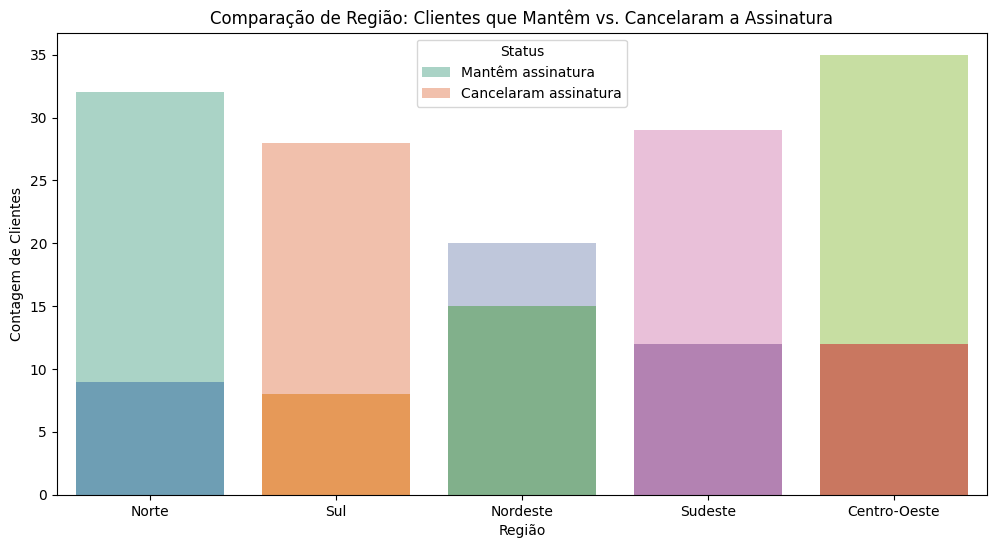

In [ ]:
# Comparação de regiões entre clientes que mantêm e cancelaram
plt.figure(figsize=(12, 6))
sns.countplot(data=df_nao_cancelaram, x='regiao', palette='Set2', label="Mantêm assinatura", alpha=0.6)
sns.countplot(data=df_cancelaram, x='regiao', palette='Set1', label="Cancelaram assinatura", alpha=0.6)
plt.legend(title="Status", labels=["Mantêm assinatura", "Cancelaram assinatura"])
plt.title('Comparação de Região: Clientes que Mantêm vs. Cancelaram a Assinatura')
plt.xlabel('Região')
plt.ylabel('Contagem de Clientes')
plt.show()

Norte e Centro-Oeste: Mostram maior proporção de clientes que mantêm suas assinaturas, sugerindo que nessas regiões o serviço pode estar alinhado às expectativas locais.

Sul: O número de cancelamentos supera o de assinaturas mantidas. Pode indicar algum desafio específico, como falta de adaptação do serviço às necessidades regionais.

Sudeste e Nordeste: Apresentam resultados equilibrados, com uma leve vantagem de assinantes que continuam.

In [ ]:
t_stat, p_value = stats.ttest_ind(df_ultimos_6_meses['tempo_assinatura_meses'], df_mais_24_meses['tempo_assinatura_meses'])
print("\nResultado do Teste T:")
print(f"Teste T: t={t_stat:.2f}, p={p_value:.6f}")

if p_value < 0.05:
    print("Diferença significativa no tempo de assinatura entre os dois grupos (p < 0.05)")
else:
    print("Nenhuma diferença significativa no tempo de assinatura entre os dois grupos (p >= 0.05)")


Resultado do Teste T:
Teste T: t=-10.58, p=0.000000
Diferença significativa no tempo de assinatura entre os dois grupos (p < 0.05)


O resultado do Teste T mostra que existe uma diferença significativa no tempo de assinatura entre os dois grupos analisados (clientes com até 6 meses e mais de 24 meses de assinatura). O valor de t=-10.58 indica uma diferença considerável nas médias, e o valor de p=0.000000 confirma que essa diferença não é por acaso (p < 0.05). Resumindo: os grupos têm comportamentos diferentes em relação ao tempo de assinatura.



In [ ]:
# Dados para cálculo da amostra
populacao = 100000  # População total de clientes
margem_erro_2 = 0.02  # Margem de erro de 2%
z_score = 1.96  # Valor Z para 95% de confiança

# Fórmula do tamanho da amostra com margem de erro de 2%
n = (z_score**2 * 0.5 * 0.5) / (margem_erro_2**2)
n = n / (1 + (n - 1) / populacao)

print("\nTamanho necessário da amostra:")
print(f"Com 95% de confiança e 2% de margem de erro: {math.ceil(n)} clientes")

# Cálculo para margem de erro de 10%
margem_erro_10 = 0.1
n_10 = (z_score**2 * 0.5 * 0.5) / (margem_erro_10**2)
n_10 = n_10 / (1 + (n_10 - 1) / populacao)

print(f"Com 95% de confiança e 10% de margem de erro: {math.ceil(n_10)} clientes")


Tamanho necessário da amostra:
Com 95% de confiança e 2% de margem de erro: 2345 clientes
Com 95% de confiança e 10% de margem de erro: 96 clientes
